# CloudSen12 Dataset

## Intro

CloudSen12 [(Aybar et al. 2022)](https://www.nature.com/articles/s41597-022-01878-2) is a dataset designed for cloud and shaddow segmentation in Sentinel-2 satellite imagery. The dataset contains Sentinel-2 optical imagery with corresponding cloud masks, focusing on accurate cloud detection across diverse geographical regions and atmospheric conditions. It represents a comprehensive dataset for advancing optical satellite image analysis, enabling improved data quality and usability for Earth observation applications.

## Dataset Characteristics

- **Modalities**: 
  - Sentinel-2 optical imagery (13 spectral bands)
- **Spatial Resolution**: 10m, 20m, 60m (resampled to 10m)
- **Temporal Resolution**: Single acquisition per location
- **Spectral Bands**: 
  - S2: 13 bands (B01, B02, B03, B04, B05, B06, B07, B08, B8A, B09, B10, B11, B12)
- **Image Dimensions**: 512x512 pixels per patch
- **Labels**: 4-class cloud segmentation masks
  - Class 0: Clear (no clouds)
  - Class 1: Cloud shadows
  - Class 2: Semi-transparent clouds
  - Class 3: Clouds
- **Geographic Distribution**: Global coverage across diverse climate zones
- **Temporal Coverage**: Various acquisition dates across multiple seasons

## Dataset Setup and Initialization

In [2]:
from pathlib import Path

from geobench_v2.datamodules import GeoBenchCloudSen12DataModule

# Setup paths
PROJECT_ROOT = Path("../../")

# Initialize datamodule
datamodule = GeoBenchCloudSen12DataModule(
    img_size=512,
    batch_size=8,
    num_workers=4,
    root=PROJECT_ROOT / "data" / "cloudsen12",
    download=True,
)
datamodule.setup("fit")
datamodule.setup("test")

print("CloudSen12 datamodule initialized successfully!")
print(f"Training samples: {len(datamodule.train_dataset)}")
print(f"Validation samples: {len(datamodule.val_dataset)}")
print(f"Test samples: {len(datamodule.test_dataset)}")

Initializing normalizer from class: ZScoreNormalizer
Initializing normalizer from class: ZScoreNormalizer
Initializing normalizer from class: ZScoreNormalizer
CloudSen12 datamodule initialized successfully!
Training samples: 4000
Validation samples: 535
Test samples: 975


In [5]:
datamodule.train_dataset.data_df.columns

Index(['internal:subfile', 'tortilla:id', 'tortilla:file_format',
       'tortilla:data_split', 'tortilla:length', 'tortilla:offset', 'stac:crs',
       'stac:geotransform', 'stac:raster_shape', 'stac:time_start',
       'stac:time_end', 'stac:centroid', 'rai:ele', 'rai:cisi', 'rai:gdp',
       'rai:hdi', 'rai:gmi', 'rai:pop', 'rai:admin0', 'rai:admin1',
       'rai:admin2', 'roi_id', 'old_roi_id', 'equi_id', 'equi_zone',
       'label_type', 's2_id', 'real_proj_shape', 's2_mean_solar_azimuth_angle',
       's2_mean_solar_zenith_angle', 'thick_percentage', 'thin_percentage',
       'cloud_shadow_percentage', 'clear_percentage'],
      dtype='object')

## Geographic Distribution Visualization

In [3]:
geo_fig = datamodule.visualize_geospatial_distribution()

ValueError: Metadata is missing required latitude and longitude information

## Target Data Statistics

## Sample Data Visualization

The dataset provides Sentinel-2 multi-spectral imagery with detailed 4-class cloud segmentation masks for comprehensive cloud detection:

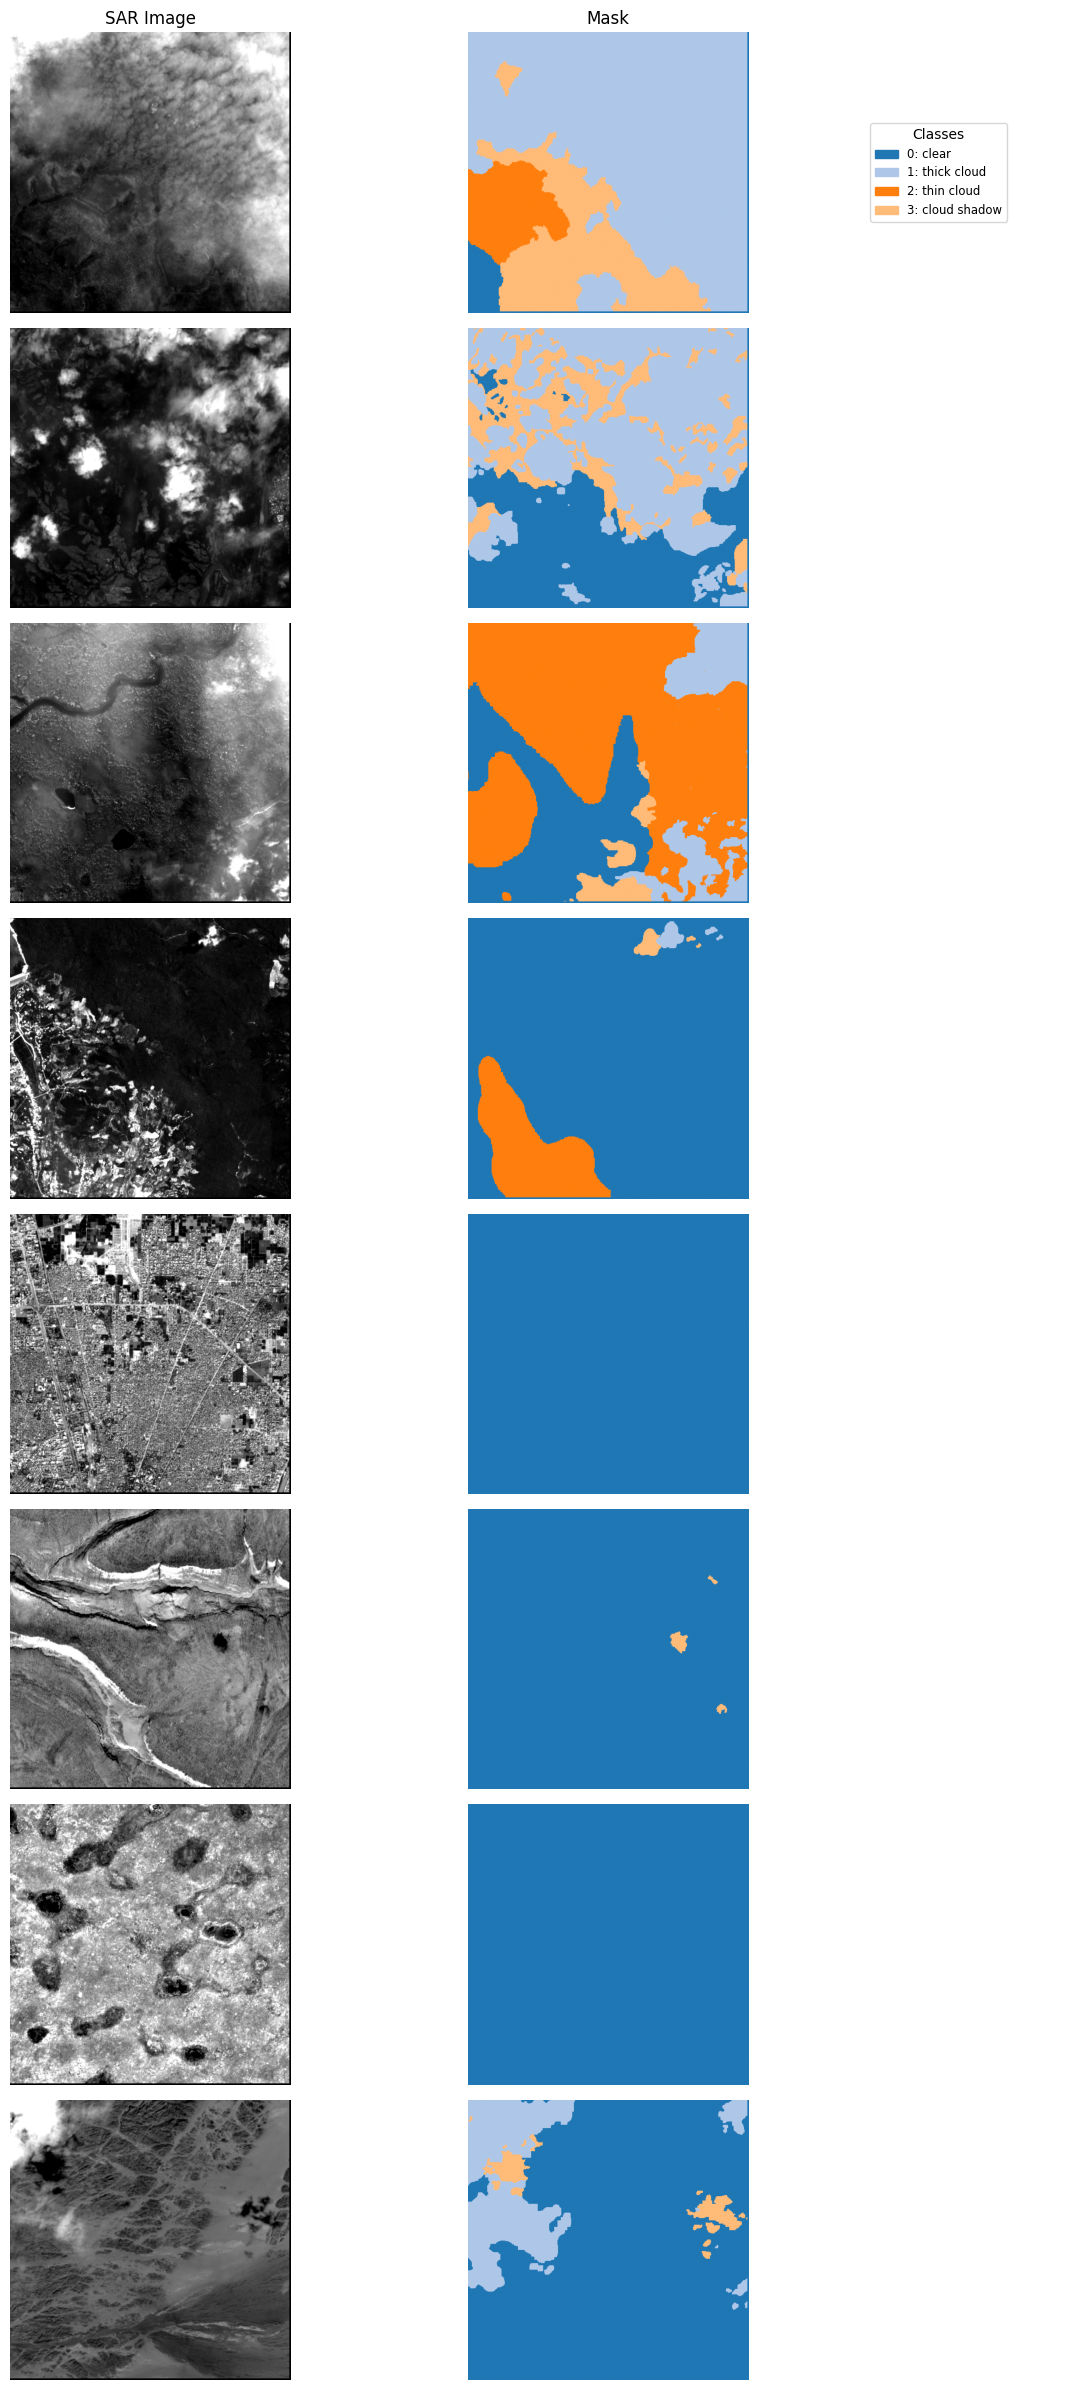

In [6]:
fig, batch = datamodule.visualize_batch()

## GeoBenchV2 Processing Pipeline

### Preprocessing Steps

1. **Patch Generation**:
   - only select "high quality" labels as flagged by the authors
   - only select the 512x512 images

2. **Dataset Subsampling**:
    - The final version consists of
        - 4,000 training samples
        - 1,000 validation samples
        - 2,000 test samples

## References

1. Aybar, Cesar, Luis Ysuhuaylas, Jhomira Loja, Karen Gonzales, Fernando Herrera, Lesly Bautista, Roy Yali et al. "CloudSEN12, a global dataset for semantic understanding of cloud and cloud shadow in Sentinel-2." Scientific data 9, no. 1 (2022): 782.
